In [46]:
# Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.model_selection import KFold

# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")
dane = data.values
X = dane[:,:-1]
y = dane[:,-1]

# Initialize our classifier
gnb = GaussianNB()

cv = KFold(n_splits=10, shuffle=True, random_state=1)


accuracies = []
recalls = []
precisions = []
matrixes = []
for train, test in cv.split(X,y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    model = gnb.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred_values)
    accuracies.append(accuracy)
    recall = metrics.recall_score(y_test, pred_values)
    recalls.append(recall)
    precision = metrics.precision_score(y_test, pred_values)
    precisions.append(precision)
    conf_mtx = metrics.confusion_matrix(y_test, pred_values)
    matrixes.append(conf_mtx)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print("Średnia dokładność %.3f (+- %.2f)" % (mean_accuracy, std_accuracy))
print("Średnia czułość %.3f (+- %.2f)" % (np.mean(recalls), np.std(recalls)))
print("Średnia precyzja %.3f (+- %.2f)" % (np.mean(precisions), np.std(precisions)))
print(np.mean(matrixes, axis=0))
matrixes_mean1 = np.mean(matrixes, axis=0)

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

predykcja1 = (df['nowe'].sum())/(df['nowe'].count())
TP1 = matrixes_mean1[0][0]
FP1 = matrixes_mean1[1][0]
FN1 = matrixes_mean1[0][1]
TN1 = matrixes_mean1[1][1]
sensitivity1 = TP1 / (TP1 + FN1)
specificity1 = TN1 / (FP1 + TN1)
precision1 = TP1 / (TP1 + FP1)
neg_prec1 = TN1 / (TN1 + FN1)
accuracy1 = (TP1 + TN1) / (TP1 + FN1 + TN1 + FP1)

Średnia dokładność 0.784 (+- 0.03)
Średnia czułość 0.751 (+- 0.05)
Średnia precyzja 0.557 (+- 0.06)
[[119.5  30.7]
 [ 12.8  38.4]]
7506
9556
0.785475094181666


In [47]:
# K Nearest Neighbours
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")
dane = data.values
X = dane[:,:-1]
y = dane[:,-1]

# Initialize our classifier
kneigh = KNeighborsClassifier(n_neighbors=20)

cv = KFold(n_splits=10, shuffle=True, random_state=1)

accuracies = []
recalls = []
precisions = []
matrixes = []
for train, test in cv.split(X,y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    model = kneigh.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred_values)
    accuracies.append(accuracy)
    recall = metrics.recall_score(y_test, pred_values)
    recalls.append(recall)
    precision = metrics.precision_score(y_test, pred_values)
    precisions.append(precision)
    conf_mtx = metrics.confusion_matrix(y_test, pred_values)
    matrixes.append(conf_mtx)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print("Średnia dokładność %.3f (+- %.2f)" % (mean_accuracy, std_accuracy))
print("Średnia czułość %.3f (+- %.2f)" % (np.mean(recalls), np.std(recalls)))
print("Średnia precyzja %.3f (+- %.2f)" % (np.mean(precisions), np.std(precisions)))
print(np.mean(matrixes, axis=0))

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

matrixes_mean2 = np.mean(matrixes, axis=0)
predykcja2 = (df['nowe'].sum())/(df['nowe'].count())
TP2 = matrixes_mean2[0][0]
FP2 = matrixes_mean2[1][0]
FN2 = matrixes_mean2[0][1]
TN2 = matrixes_mean2[1][1]
sensitivity2 = TP2 / (TP2 + FN2)
specificity2 = TN2 / (FP2 + TN2)
precision2 = TP2 / (TP2 + FP2)
neg_prec2 = TN2 / (TN2 + FN2)
accuracy2 = (TP2 + TN2) / (TP2 + FN2 + TN2 + FP2)

Średnia dokładność 0.796 (+- 0.03)
Średnia czułość 0.349 (+- 0.06)
Średnia precyzja 0.698 (+- 0.08)
[[142.6   7.6]
 [ 33.5  17.7]]
8823
9556
0.9232942653830054


Średnia dokładność 0.817 (+- 0.03)
Średnia czułość 0.615 (+- 0.08)
Średnia precyzja 0.656 (+- 0.08)
[[133.1  17.1]
 [ 19.7  31.5]]


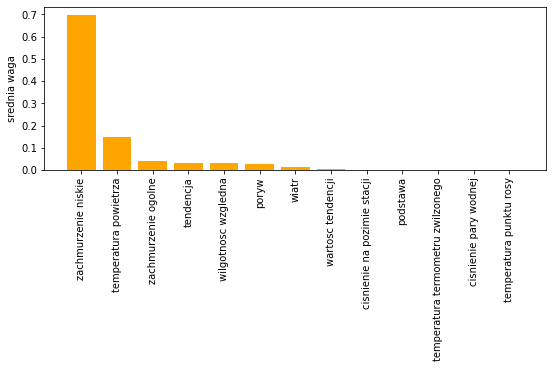

7804
9556
0.8166596902469653


In [48]:
# Decision Trees
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import statistics

# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")


dictionary = {
    "podstawa": [],
    "zachmurzenie ogolne": [],
    "wiatr": [],
    "poryw": [],
    "temperatura powietrza": [],
    "temperatura termometru zwilzonego": [],
    "cisnienie pary wodnej": [],
    "wilgotnosc wzgledna": [],
    "temperatura punktu rosy": [],
    "cisnienie na pozimie stacji": [],
    "tendencja": [],
    "wartosc tendencji": [],
    "zachmurzenie niskie": []
}

accuracy = {"dokladnosc": []}
recall = {"czulosc": []}
precision = {"precyzja": []}
auc = {"auc": []}


# dividing data into attributes and labels
X = data.drop('klasa', axis=1)
y = data['klasa']


# train the algorithm
classifier = DecisionTreeClassifier(max_depth=4, random_state=100)

cv = KFold(n_splits=10, shuffle=True, random_state=1)

accuracies = []
recalls = []
precisions = []
matrixes = []
for train, test in cv.split(X,y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    model = classifier.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred_values)
    accuracies.append(accuracy)
    recall = metrics.recall_score(y_test, pred_values)
    recalls.append(recall)
    precision = metrics.precision_score(y_test, pred_values)
    precisions.append(precision)
    conf_mtx = metrics.confusion_matrix(y_test, pred_values)
    matrixes.append(conf_mtx)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print("Średnia dokładność %.3f (+- %.2f)" % (mean_accuracy, std_accuracy))
print("Średnia czułość %.3f (+- %.2f)" % (np.mean(recalls), np.std(recalls)))
print("Średnia precyzja %.3f (+- %.2f)" % (np.mean(precisions), np.std(precisions)))
print(np.mean(matrixes, axis=0))
    

# plot decision tree
#fig = plt.figure(figsize=(200,150))
#tree.plot_tree(classifier, max_depth=5, feature_names=feature_names, class_names=True, filled=True) 

# feature importance
importance = pd.DataFrame({'feature': X_train.columns, 
'importance' : np.round(classifier.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
    
dictionary["podstawa"].append(importance["importance"][0])
dictionary["zachmurzenie ogolne"].append(importance["importance"][1])
dictionary["wiatr"].append(importance["importance"][2])
dictionary["poryw"].append(importance["importance"][3])
dictionary["temperatura powietrza"].append(importance["importance"][4])
dictionary["temperatura termometru zwilzonego"].append(importance["importance"][5])
dictionary["cisnienie pary wodnej"].append(importance["importance"][6])
dictionary["wilgotnosc wzgledna"].append(importance["importance"][7])
dictionary["temperatura punktu rosy"].append(importance["importance"][8])
dictionary["cisnienie na pozimie stacji"].append(importance["importance"][9])
dictionary["tendencja"].append(importance["importance"][10])
dictionary["wartosc tendencji"].append(importance["importance"][11])
dictionary["zachmurzenie niskie"].append(importance["importance"][12])
#print(dictionary)
#print('Accuracy:', accuracy)


df = pd.DataFrame(columns=['parametr', 'srednia'])

# adding values to the dataframe
for x in dictionary:
    df = df.append({'parametr': x, 'srednia': statistics.mean(dictionary[x])}, ignore_index=True)
sort = df.sort_values(by=['srednia'], ascending=False)

# bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
plt.bar(sort['parametr'], sort['srednia'], color='orange')
plt.xticks(rotation='vertical')
plt.ylabel('srednia waga')
plt.show()

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

matrixes_mean3 = np.mean(matrixes, axis=0)
predykcja3 = (df['nowe'].sum())/(df['nowe'].count())
TP3 = matrixes_mean3[0][0]
FP3 = matrixes_mean3[1][0]
FN3 = matrixes_mean3[0][1]
TN3 = matrixes_mean3[1][1]
sensitivity3 = TP3 / (TP3 + FN3)
specificity3 = TN3 / (FP3 + TN3)
precision3 = TP3 / (TP3 + FP3)
neg_prec3 = TN3 / (TN3 + FN3)
accuracy3 = (TP3 + TN3) / (TP3 + FN3 + TN3 + FP3)

In [49]:
#SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")
dane = data.values
X = dane[:,:-1]
y = dane[:,-1]

# Initialize our classifier
svm = svm.SVC(kernel='linear') # Linear Kernel

cv = KFold(n_splits=10, shuffle=True, random_state=1)

accuracies = []
recalls = []
precisions = []
matrixes = []
for train, test in cv.split(X,y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    model = svm.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred_values)
    accuracies.append(accuracy)
    recall = metrics.recall_score(y_test, pred_values)
    recalls.append(recall)
    precision = metrics.precision_score(y_test, pred_values)
    precisions.append(precision)
    conf_mtx = metrics.confusion_matrix(y_test, pred_values)
    matrixes.append(conf_mtx)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print("Średnia dokładność %.3f (+- %.2f)" % (mean_accuracy, std_accuracy))
print("Średnia czułość %.3f (+- %.2f)" % (np.mean(recalls), np.std(recalls)))
print("Średnia precyzja %.3f (+- %.2f)" % (np.mean(precisions), np.std(precisions)))
print(np.mean(matrixes, axis=0))

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

matrixes_mean4 = np.mean(matrixes, axis=0)
predykcja4 = (df['nowe'].sum())/(df['nowe'].count())
TP4 = matrixes_mean4[0][0]
FP4 = matrixes_mean4[1][0]
FN4 = matrixes_mean4[0][1]
TN4 = matrixes_mean4[1][1]
sensitivity4 = TP4 / (TP4 + FN4)
specificity4 = TN4 / (FP4 + TN4)
precision4 = TP4 / (TP4 + FP4)
neg_prec4 = TN4 / (TN4 + FN4)
accuracy4 = (TP4 + TN4) / (TP4 + FN4 + TN4 + FP4)


Średnia dokładność 0.807 (+- 0.03)
Średnia czułość 0.647 (+- 0.06)
Średnia precyzja 0.619 (+- 0.07)
[[129.5  20.7]
 [ 18.1  33.1]]
7712
9556
0.8070322310590206


In [50]:
# Logistic Regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import *

data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")
dane = data.values
X = dane[:,:-1]
y = dane[:,-1]

LR = LogisticRegression(solver='liblinear', random_state=80, penalty='l2', max_iter=100, C=0.4)

cv = KFold(n_splits=10, shuffle=True, random_state=1)

accuracies = []
recalls = []
precisions = []
matrixes = []
for train, test in cv.split(X,y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    model = LR.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred_values)
    accuracies.append(accuracy)
    recall = metrics.recall_score(y_test, pred_values)
    recalls.append(recall)
    precision = metrics.precision_score(y_test, pred_values)
    precisions.append(precision)
    conf_mtx = metrics.confusion_matrix(y_test, pred_values)
    matrixes.append(conf_mtx)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print("Średnia dokładność %.3f (+- %.2f)" % (mean_accuracy, std_accuracy))
print("Średnia czułość %.3f (+- %.2f)" % (np.mean(recalls), np.std(recalls)))
print("Średnia precyzja %.3f (+- %.2f)" % (np.mean(precisions), np.std(precisions)))
print(np.mean(matrixes, axis=0))

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

matrixes_mean5 = np.mean(matrixes, axis=0)
predykcja5 = (df['nowe'].sum())/(df['nowe'].count())
TP5 = matrixes_mean5[0][0]
FP5 = matrixes_mean5[1][0]
FN5 = matrixes_mean5[0][1]
TN5 = matrixes_mean5[1][1]
sensitivity5 = TP5 / (TP5 + FN5)
specificity5 = TN5 / (FP5 + TN5)
precision5 = TP5 / (TP5 + FP5)
neg_prec5 = TN5 / (TN5 + FN5)
accuracy5 = (TP5 + TN5) / (TP5 + FN5 + TN5 + FP5)

Średnia dokładność 0.805 (+- 0.03)
Średnia czułość 0.623 (+- 0.07)
Średnia precyzja 0.622 (+- 0.07)
[[130.3  19.9]
 [ 19.3  31.9]]
7717
9556
0.8075554625366262


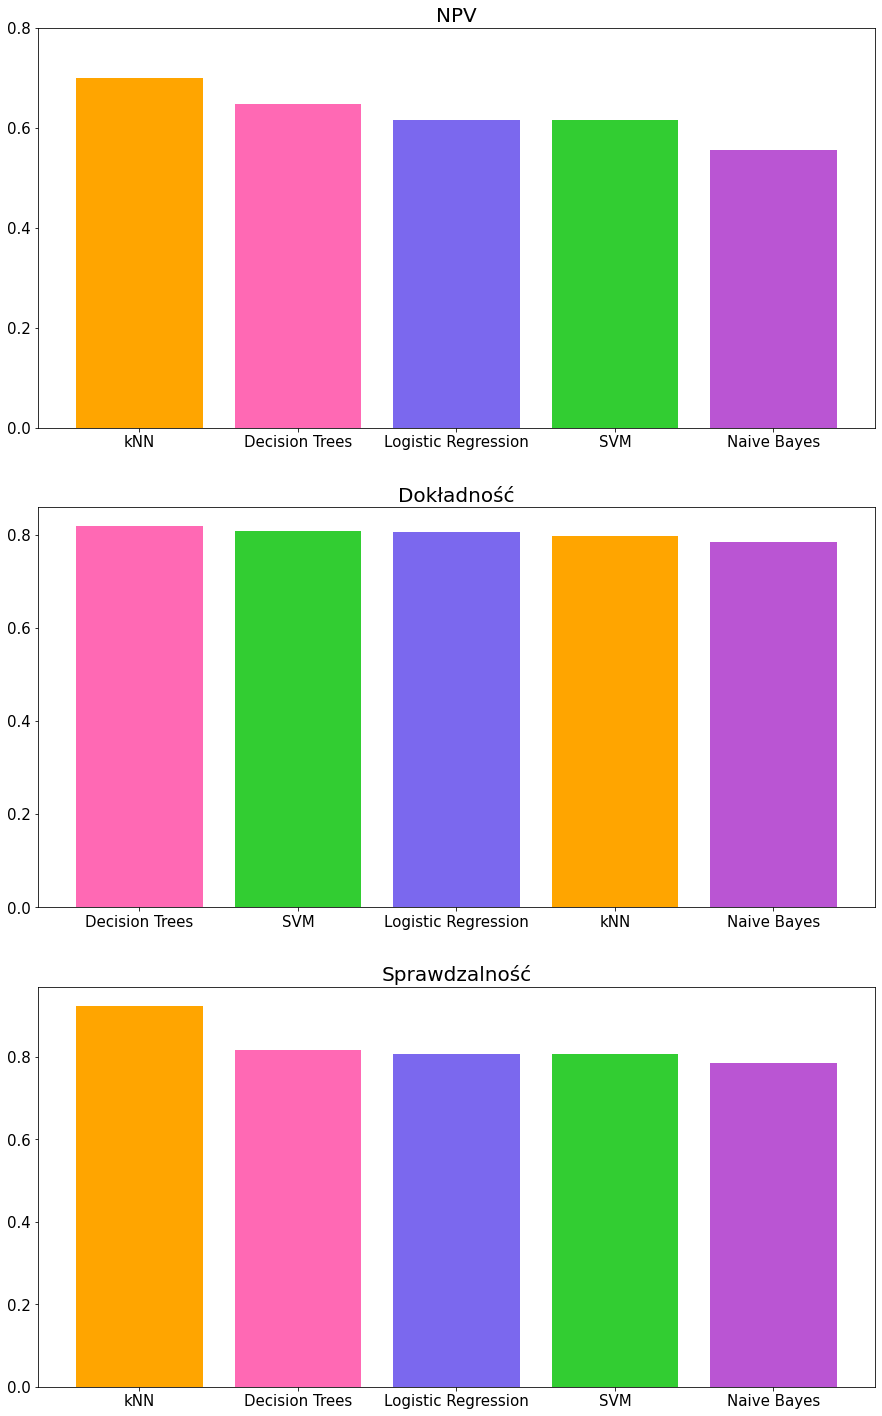

In [56]:
metody = ['Naive Bayes', 'kNN', 'Decision Trees', 'SVM', 'Logistic Regression']
barwy = ['mediumorchid', 'orange', 'hotpink', 'limegreen', 'mediumslateblue']
wyniki = pd.DataFrame({'metody': metody, 'barwy': barwy,
                        'czulosc': list([sensitivity1, sensitivity2, sensitivity3, sensitivity4, sensitivity5]),
                       'specyficznosc': list([specificity1, specificity2, specificity3, specificity4, specificity5]),
                       'precyzja': list([precision1, precision2, precision3, precision4, precision5]),
                       'NPV': list([neg_prec1, neg_prec2, neg_prec3, neg_prec4, neg_prec5]),
                       'dokladnosc': list([accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]),
                       'predykcja': list([predykcja1, predykcja2, predykcja3, predykcja4, predykcja5])})

sort1 = wyniki.sort_values('czulosc', ascending=False)
plt.figure(figsize=(15, 25))
plt.subplot(3,1,1)
plt.bar('metody', 'czulosc', data=sort1, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Czułość', fontsize=20)

sort2 = wyniki.sort_values('specyficznosc', ascending=False)
plt.subplot(3,1,2)
plt.bar('metody', 'specyficznosc', data=sort2, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Specyficzność', fontsize=20)

sort3 = wyniki.sort_values('precyzja', ascending=False)
plt.subplot(3,1,3)
plt.bar('metody', 'precyzja', data=sort3, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Precyzja', fontsize=20)

sort4 = wyniki.sort_values('NPV', ascending=False)
plt.subplot(3,1,1)
plt.bar('metody', 'NPV', data=sort4, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('NPV', fontsize=20)

sort5 = wyniki.sort_values('dokladnosc', ascending=False)
plt.subplot(3,1,2)
plt.bar('metody', 'dokladnosc', data=sort5, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Dokładność', fontsize=20)

sort6 = wyniki.sort_values('predykcja', ascending=False)
plt.subplot(3,1,3)
plt.bar('metody', 'predykcja', data=sort6, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Sprawdzalność', fontsize=20)
plt.show()
